# 巧克力销售数据
## 1. 导入依赖库

使用 Python 库进行数据分析和可视化：

- **pandas**：用于数据读取、清洗、结构化分析
- **numpy**：用于数值处理（辅助用）
- **matplotlib** 和 **seaborn**：用于绘图和可视化


In [1]:
# 导入库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置图形风格
sns.set(style='whitegrid') # 设置 Seaborn 图表为白底+网格线
# 'darkgrid'（灰底+网格线）
# 'whitegrid'（白底+网格线）
# 'dark'（灰底）
# 'white'（白底）
# 'ticks'（白底+刻度线更突出）
plt.rcParams['font.family'] = 'Arial' # 设置图中字体为 Arial


## 2. 读取与预览数据

使用 `pandas` 读取 CSV 文件，并查看前几行数据了解结构。


In [2]:
# 读取数据
df = pd.read_csv('Chocolate Sales.csv')
# 预览数据
df.head() # 看开头几行 默认5行
df.tail() # 看最后几行 默认5行 括号内输数字


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,"$4,410",323
1090,Jehu Rudeforth,USA,White Choc,07-Jun-22,"$6,559",119
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,$574,217
1092,Dotty Strutley,India,Eclairs,28-Jul-22,"$2,086",384
1093,Karlen McCaffrey,India,70% Dark Bites,23-May-22,"$5,075",344


## 3. 数据清洗与预处理

- 查看数据类型和缺失情况  
- 去除空行空列  
- 去除列名空格防止访问错误  


In [3]:
# 清洗列名（去除首尾空格）
df.columns = df.columns.str.strip() # df.columns存储行名或列名的结构index 是一种不可变的序列 支持字符串操作、集合操作
# type()	查看整个对象的类型
#.dtype	数组/列中元素的类型 适用于NumPy / Pandas 列
#字符串的 strip() 方法，应用到整列数据上
# 相当于
# df['Name'][0].strip()
# df['Name'][1].strip()

In [36]:
# 删除全空的行和列
df = df.dropna(how='all')  #默认 axis=0 表示行
df = df.dropna(axis=1, how='all') # axis=1 表示列
# dropna() 是 Pandas 的一个方法，用来丢弃缺失数据（NaN）
# how='all' 表示只有当所有值都是 NaN的时候，才会删除
# 如果是 how='any'，那就是只要有一个 NaN 就删，比较激进
# 在用 pd.read_csv() 读取 CSV 时，Pandas 默认会自动把常见的空值标记（如空字符串、NA, NaN, NULL 等）转换成 np.nan
# 可以通过手动指定 na_values 来控制哪些值被当作空值
# df = pd.read_csv('data.csv', na_values=['-', 'missing', 'none'])
# np.nan 是用来代表 缺失数据 的标志，它在 Pandas / NumPy 中非常常用，
# 作用：填补空值、判断空值、清洗数据。


In [5]:
# ️查看数据结构和缺失情况
df.info()
# DataFrame 中，一般你看到 object，大概率是字符串列
df.isnull().sum()
# 返回一个“布尔表格”，空值是 True，其他是 False
# .sum()
# 在布尔值中，True 会被当成 1，False 是 0，所以 sum() 就统计了每列中 True 的个数（也就是 NaN 的个数）

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

## 4. 特殊字段清洗（金额 & 日期）

将字符串类型的 `Amount` 金额列转换为数值型，并将 `Date` 转换为标准时间格式。


In [37]:
# 清洗 Amount 金额列（去掉 $ 并转为 float）
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float) #.astype(...) 的作用是：把 Series 或 DataFrame 转换成指定的数据类型
# 匹配 $ 和 , 这两个符号（注意 $ 要加反斜杠转义），
# regex=True 表示你这是一个正则表达式，不是普通的字符串替换
# '' 表示把匹配到的符号都替换成空（= 删除）
# df['列名']  # 选取某一列，返回一个 Series
# df[['列1', '列2']]  # 选取多列，返回一个新的 DataFrame
# df[布尔条件]  # 用于筛选行
# df.iloc[行号] 或 df.loc[标签]  # 用于行或列定位（更精准） 
# 底层逻辑df.__getitem__('列名')



# 转换 Date 列为 datetime 类型
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y', errors='raise')
# Pandas 中专门用来把“字符串 → 时间格式”的方法
# format='%d-%b-%y'
# 明确告诉 Pandas：字符串的时间格式是
# %d 表示两位数字的日期
# %b 表示月份的缩写（例如，Jan, Feb, Mar）
# %y 表示年份的后两位数字
# errors='raise'
# 表示遇到错误格式时，要直接 抛出错误（报错）：
# 'raise'：默认值，出错就抛异常
# 'coerce'：出错时自动转为 NaT（时间里的 NaN）
# 'ignore'：保留原样，不转换出错的那一行

# 再次预览清洗后的数据
df.head()


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   float64       
 5   Boxes Shipped  1094 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 51.4+ KB


## 5. 基本统计分析

使用 `pandas` 提供的 `.describe()` 方法对数值型数据进行统计汇总，查看数据的均值、中位数、标准差等指标。
同时分析：
- 销售额和发货箱数的基本统计
- 国家之间的销售额差异
- 销售员的表现
- 销售与品牌之间的关系



In [8]:
# 销售额和发货箱数的基本统计
df[['Amount', 'Boxes Shipped']].describe()
# 行名	含义
# count	非空值的数量（NaN 不算）
# mean	平均值
# std	标准差（数据波动大小）

,Amount,Boxes Shipped
count,1094.000000,1094.000000
mean,5652.308044,161.797989
std,4102.442014,121.544145
min,7.000000,1.000000
25%,2390.500000,70.000000
50%,4868.500000,135.000000
75%,8027.250000,228.750000
max,22050.000000,709.000000


In [9]:
# 每个国家的销售总额（降序排序）
sales_by_country = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)# 分组聚合（GroupBy）+ 排序分析
sales_by_country
# .sort_values() 是 Pandas 用来根据数值或列排序的方法，
# ascending=False 表示从大到小排序，默认是从小到大。

Country
Australia      1137367.0
UK             1051792.0
India          1045800.0
USA            1035349.0
Canada          962899.0
New Zealand     950418.0
Name: Amount, dtype: float64

In [10]:
# 每个销售人员的销售总额（降序） 
sales_by_person = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False)# 找销冠
sales_by_person.head(20)



Sales Person
Ches Bonnell           320901.0
Oby Sorrel             316645.0
Madelene Upcott        316099.0
Brien Boise            312816.0
Kelci Walkden          311710.0
Van Tuxwell            303149.0
Dennison Crosswaite    291669.0
Beverie Moffet         278922.0
Kaine Padly            266490.0
Marney O'Breen         259742.0
Barr Faughny           258713.0
Roddy Speechley        251062.0
Gunar Cockshoot        238483.0
Gigi Bohling           232666.0
Karlen McCaffrey       223895.0
Jehu Rudeforth         220976.0
Jan Morforth           219667.0
Curtice Advani         216461.0
Rafaelita Blaksland    210245.0
Husein Augar           205212.0
Name: Amount, dtype: float64

In [11]:
# 销售与品牌之间的关系
sales_by_Product = df.groupby('Product')['Amount'].sum().sort_values(ascending=False)
sales_by_Product

Product
Smooth Sliky Salty      349692.0
50% Dark Bites          341712.0
White Choc              329147.0
Peanut Butter Cubes     324842.0
Eclairs                 312445.0
99% Dark & Pure         299796.0
85% Dark Bars           299229.0
Organic Choco Syrup     294700.0
Spicy Special Slims     293454.0
Mint Chip Choco         283969.0
Almond Choco            277536.0
Manuka Honey Choco      275541.0
Milk Bars               269248.0
Raspberry Choco         264740.0
After Nines             261331.0
Fruit & Nut Bars        259147.0
Drinking Coco           256655.0
Orange Choco            256144.0
Baker's Choco Chips     249613.0
Choco Coated Almonds    241486.0
Caramel Stuffed Bars    231588.0
70% Dark Bites          211610.0
Name: Amount, dtype: float64

## 6. 数据可视化（Visualization）

使用 `matplotlib` 和 `seaborn` 对销售数据进行可视化，观察数据分布与趋势。

### 6.1 不同国家的销售额


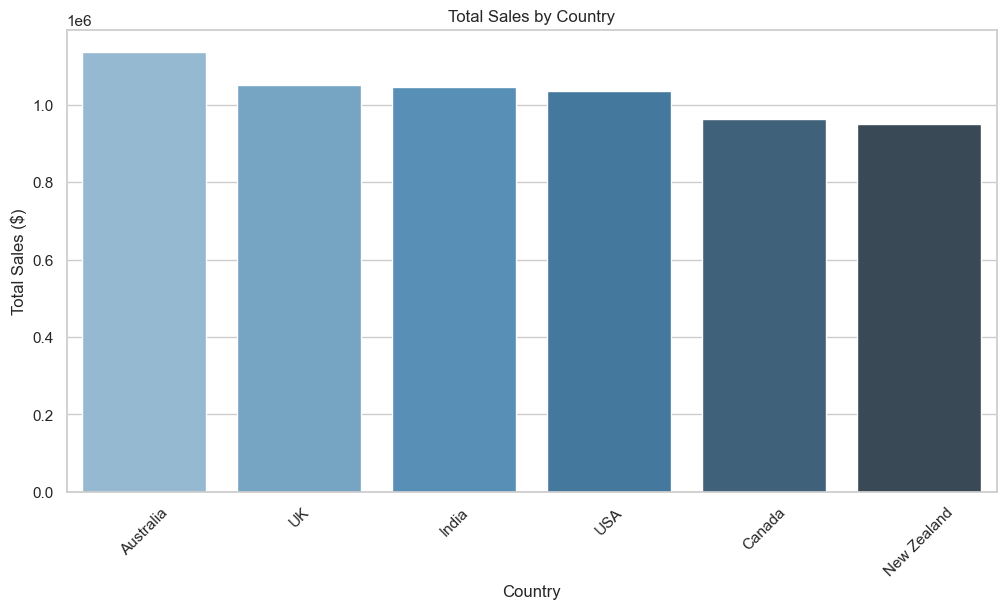

In [12]:
plt.figure(figsize=(12, 6))#创建一个图形对象，设置图的大小为 12 宽 × 6 高（单位是英寸）
sns.barplot(x=sales_by_country.index, #横轴使用国家名称（Series 的索引）  barplot() 方法
# barplot() 绘制一个柱状图
            y=sales_by_country.values,#纵轴使用每个国家的销售额
            hue=sales_by_country.index,#表示用颜色区分数据的子类别（子组）
            palette="Blues_d",#使用 Seaborn 内置的“蓝色渐变”调色板
            legend=False)#legend 控制是否显示图例（图右边那块解释颜色含义的小区域） x 变量也当成 hue 来用了（只是为了配合调色板）
plt.title("Total Sales by Country") #设置图表标 按国家/地区划分的总销售额
plt.xlabel("Country") #设置 x 轴标签为 Country 国家/地区
plt.ylabel("Total Sales ($)") #设置 y 轴标签为 Total Sales ($)，表示销售额（单位是美元）
plt.xticks(rotation=45) # plt.xticks() 设置/获取 x 轴刻度（ticks）的位置和标签的 标签的角度（rotation）这里为倾斜45°
# ticks, labels = plt.xticks() 获取当前 x 轴的刻度位置和标签内容
# plt.xticks([0, 1, 2]) 只设置 刻度的位置，不管标签是什么（标签会默认是位置的数字）
# lt.xticks([0, 1, 2], ['USA', 'Canada', 'Germany']) 设置横轴在哪些位置显示哪些标签
plt.show() # 显示图表 渲染输出

### 6.2 销售额分布情况


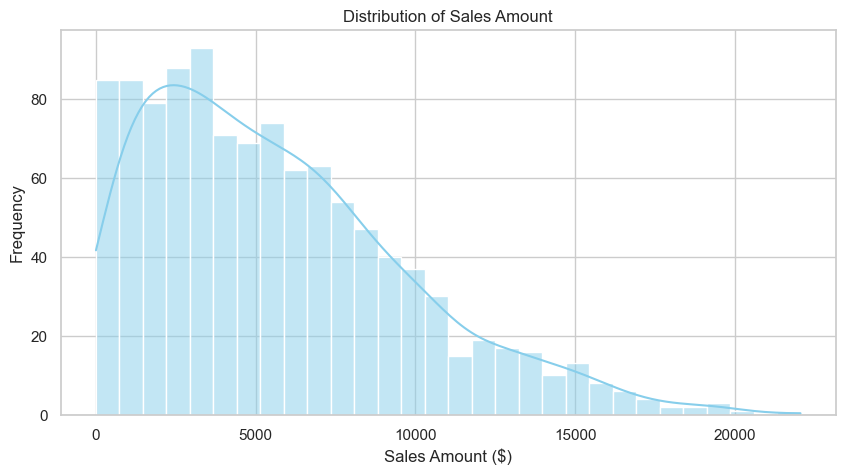

In [44]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df['Amount'], bins=30, kde=True, color='skyblue')
# 画直方图（Histogram） 统计数据在不同区间（bin）内的数量，并画出柱状图来可视化分布
# data=指定数据来源 
# bins=30 划分多少个区间（bin）来统计频数 份数
# kde=Kernel Density Estimate（核密度估计）概率密度趋势线
# 作用
# 看数据是否呈正态分布
# 看是否存在多峰值
# 看集中趋势/偏移趋势
plt.title("Distribution of Sales Amount") # 销售额分布
plt.xlabel("Sales Amount ($)")
plt.ylabel("Frequency") # 频率
plt.show()

### 6.3 每日销售趋势


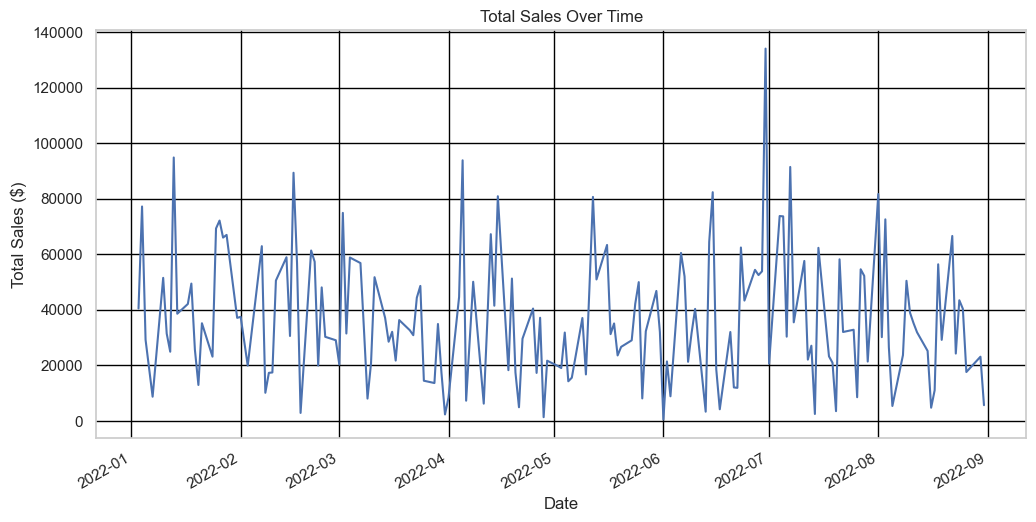

In [14]:
plt.figure(figsize=(12, 6))
df.groupby('Date')['Amount'].sum().plot()
# .plot()pandas 中内置的可视化函数 自动画成一张折线图
# 如果 Date 列是时间格式（datetime64[ns]），自动以时间为横轴，画出时间序列图
plt.title("Total Sales Over Time") #一段时间内的总销售额
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.grid(color='black')#控制图表中的网格线是否显示 还有哪些方向，其他参数显示线型、颜色、透明度
# plt.grid(True)	开启网格线（默认）
# plt.grid(False)	关闭网格线
# plt.grid(axis='y')	只显示纵向网格线
# plt.grid(linestyle='--')	设置网格线为虚线
# plt.grid(color='gray', alpha=0.5)	自定义颜色和透明度
# plt.xticks(rotation=45)
plt.show()

### 6.4 销售员业绩对比（前10）


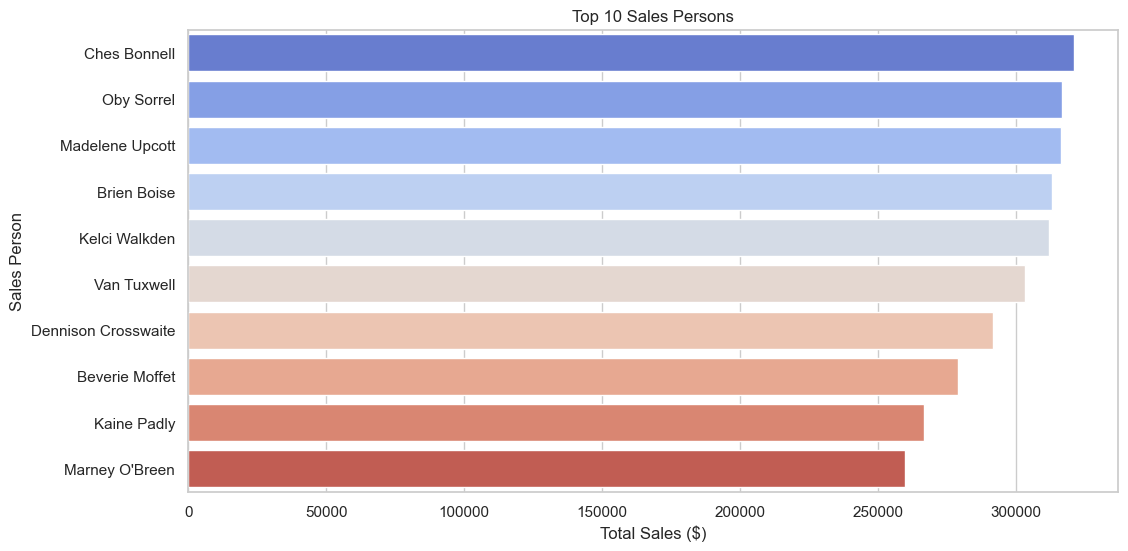

In [46]:
top_sellers = sales_by_person.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_sellers.values, 
            y=top_sellers.index, 
            hue=top_sellers.index,
            palette="coolwarm", # 设置柱子的颜色渐变风格 "coolwarm" 是一种从冷到暖的颜色主题
            legend=False)
plt.title("Top 10 Sales Persons")
plt.xlabel("Total Sales ($)")
plt.ylabel("Sales Person")
plt.show()


### 6.5按月、季度、周统计销售趋势
将 `Date` 列转换为时间索引后，统计不同周期的销售总额。

In [16]:
# 设置日期为索引
df_ts = df.set_index('Date')
# 把 DataFrame 中的 "Date" 列设置为索引（index）
# 这一步是为了后续可以使用 .resample()，它必须基于时间索引
# 按月统计
monthly_sales = df_ts['Amount'].resample('ME').sum()
# df_ts['Amount']	取出金额列
# .resample('ME')	以每月月末为频率（Monthly End）分组
# .sum()	每组内求和，得到每月总销售额
# 按季度统计
quarterly_sales = df_ts['Amount'].resample('QE').sum() # 每季度末为周期重采样
# 按周统计
weekly_sales = df_ts['Amount'].resample('W-SUN').sum() # 每周以周日为周期重采样

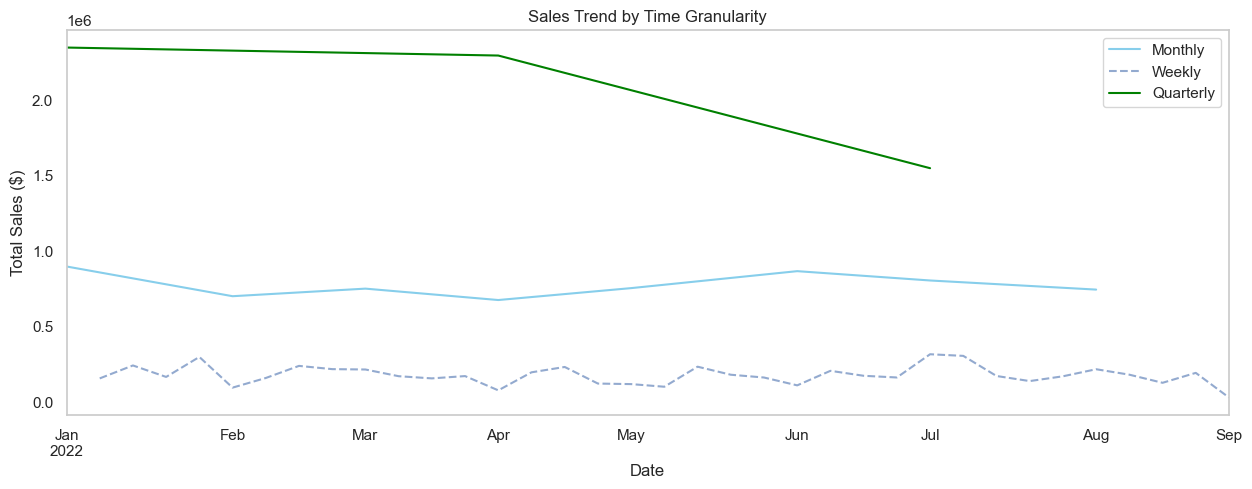

In [17]:
plt.figure(figsize=(15, 5))
monthly_sales.plot(label='Monthly', color='skyblue')
# label	图例名称（显示在 legend 中）
# color	线的颜色	'skyblue', 'green' 等
# linestyle	线条样式：'-' 实线、'--' 虚线等
# .plot(king='')
# kind='bar'	柱状图	柱子
# kind='area'	面积图	一大片色块
weekly_sales.plot(label='Weekly', alpha=0.6, linestyle='--')
quarterly_sales.plot(label='Quarterly', color='green')
plt.title("Sales Trend by Time Granularity")
plt.legend()# 显示图例（legend）
plt.ylabel("Total Sales ($)")
plt.grid()# 显示背景网格线
plt.show()

### 6.6 按国家/地区划分的季度销售额 


In [19]:
# 设置日期为索引
df_ts = df.set_index('Date')
# 添加时间相关列（此时 df_ts 的 index 是 DatetimeIndex）
df_ts['Year'] = df_ts.index.year
df_ts['Quarter'] = df_ts.index.quarter
# 每年每季度每国家销售额
country_pivot = df_ts.pivot_table( # pivot_table() 透视表 对数据进行分组、聚合、重排，形成类似 Excel 透视表的结构
    index=['Year', 'Quarter'], # 指定用 年 + 季度 作为透视表的行索引（index）。也就是按这个组合进行分组
    columns='Country', # 每一列是一个国家，最终表格会有多个国家作为列名
    values='Amount', # 要进行汇总统计的字段是 Amount，也就是销售额
    aggfunc='sum' # 汇总方法是“求和”。也可以换成 'mean'（求平均）或 'count'（计数）
)
country_pivot

Country       Australia    Canada     India  New Zealand        UK       USA
Year Quarter                                                                
2022 1         479220.0  407862.0  323351.0     395801.0  393953.0  344778.0
     2         390544.0  261534.0  398895.0     363993.0  469336.0  407785.0
     3         267603.0  293503.0  323554.0     190624.0  188503.0  282786.0

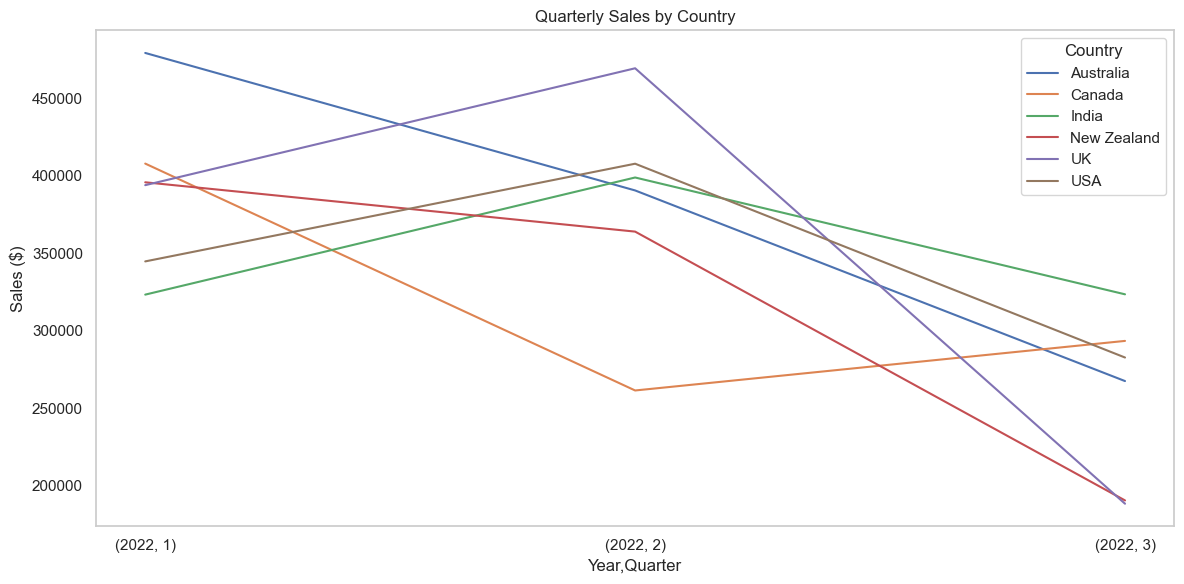

In [20]:
country_pivot.plot(figsize=(12, 6))
plt.title('Quarterly Sales by Country')# 按国家/地区划分的季度销售额
plt.ylabel("Sales ($)")
plt.grid()
plt.tight_layout()# 自动调整子图（包括标题、标签、刻度）的位置和大小，防止内容被遮挡或重叠。
plt.show()

### 6.6 不同季度下，前几名各个品牌与销售量之间的关系

In [41]:
quarter_product_sales = df_ts.pivot_table(
    index=['Year', 'Quarter'],
    columns='Product',# 每一列是一个产品，最终表格会有多个产品作为列名
    values='Amount',
    aggfunc='sum'
)

# 选择每个季度要显示的前几个产品
top_n = 3  # 可修改 5、10 等，表示每个季度显示前多少个畅销产品

# 用来保存结果的列表
rows = []

# 遍历每个季度（每行）对每个季度的产品销售额进行排序，找出销售额前 n 的产品
for idx, row in quarter_product_sales.iterrows():
    # iterrows()，在 Pandas 中的作用是逐行遍历 DataFrame，对于每一行，会返回：
    # idx：当前行的索引是一个元组 (Year, Quarter)，比如 (2022, 1)
    # row：当前行的实际内容，是一个 Series（这一行的数据）包含该季度所有产品的销售额
    # 在这里每一行代表一个季度的数据，而每一列（除了索引）代表一个产品的销售额
    
    # 对每个季度的产品销售额按降序排列
    sorted_row = row.sort_values(ascending=False)
    # 得到一个新的 Series，索引是产品名，值是销售额
    
    # 获取销售额前 n 名的产品
    top_products = sorted_row.head(top_n)
    
    # 将每个季度前 n 个产品添加到结果中
    for rank, (product, sales) in enumerate(top_products.items(), start=1):
        # top_products.items()：把 Series 转成 (key, value) 形式的迭代器，也就是 (产品名, 销售额)
        # enumerate遍历（loop）的时候加上“索引”，也就是你可以同时拿到索引和元素值 ，索引从1开始
        # enumerate(..., start=1)：给每个产品自动加上“第几名”（rank），从1开始
        rows.append({
            'Year': idx[0],  # 年份
            'Quarter': idx[1],  # 季度
            'Rank': rank,  # 排名
            'Product': product,  # 产品名
            'Amount': sales  # 销售额
        })
        # 构建一个字典，代表当前这个季度的第 N 名产品信息
        # idx[0] 是年，idx[1] 是季度（因为前面 idx = (Year, Quarter)）
        # 把这个字典追加到 rows 列表中，准备后面构建成一个新的 DataFrame

# 转换成 DataFrame 进行展示 新的表 目的：宽表->长表
top_products_per_quarter = pd.DataFrame(rows)

# 查看结果
top_products_per_quarter



,Year,Quarter,Rank,Product,Amount
0,2022,1,1,Peanut Butter Cubes,161329.0
1,2022,1,2,Eclairs,151060.0
2,2022,1,3,Smooth Sliky Salty,147084.0
3,2022,2,1,Orange Choco,153503.0
4,2022,2,2,Raspberry Choco,142765.0
5,2022,2,3,85% Dark Bars,133602.0
6,2022,3,1,White Choc,126952.0
7,2022,3,2,85% Dark Bars,121674.0
8,2022,3,3,Organic Choco Syrup,118027.0


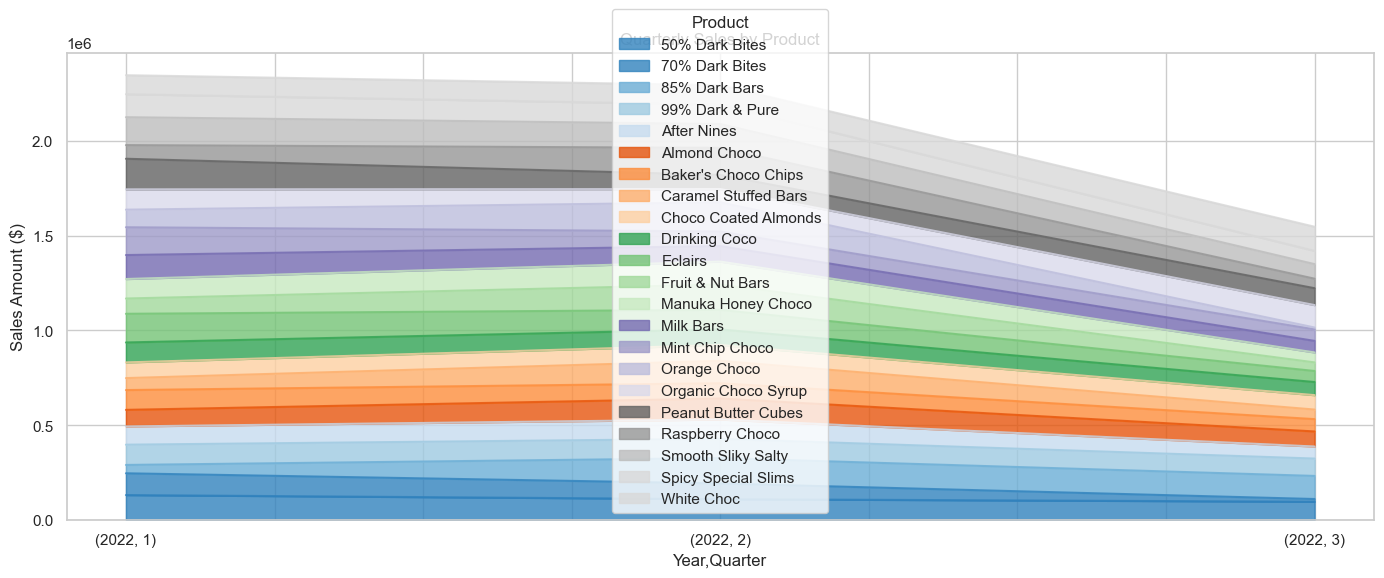

In [34]:
quarter_product_sales.plot(kind='area', figsize=(14, 6), colormap='tab20c', alpha=0.8)
# 使用内置的配色方案，tab20c 是比较柔和的 20 色调色板
# alpha 透明度
plt.title('Quarterly Sales by Product')
plt.ylabel('Sales Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

### 6.7 按销售排名的 Top N 产品

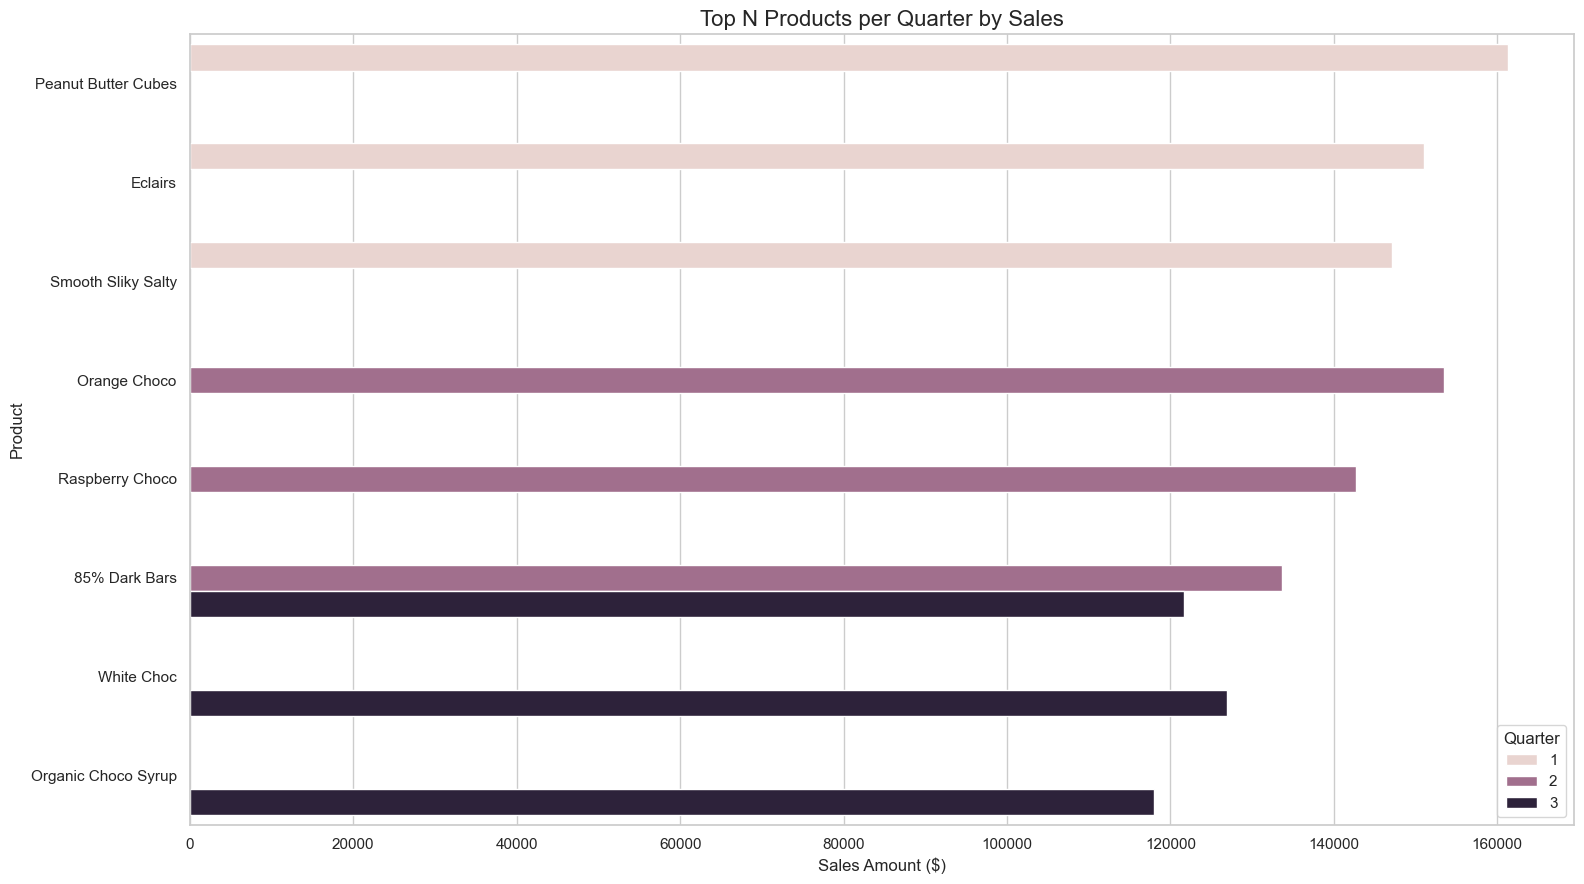

In [43]:
# 绘制图形
plt.figure(figsize=(16, 9))

# 使用 seaborn 绘制条形图，按产品和季度来展示
sns.barplot(data=top_products_per_quarter, 
            x='Amount',
            y='Product', 
            hue='Quarter', #不同季度用不同颜色区分 
            dodge=True) # 同一个产品，不同季度的柱子并排显示（更容易比较）
# seaborn 画条形图（barplot） 或 柱状图（countplot）常用
# dodge=True 表示“让不同组的柱子并排显示”
# dodge=False 表示“让柱子叠在一起（重合在同一个位置）”

# 设置标题和标签
plt.title('Top N Products per Quarter by Sales', fontsize=16) #fontsize=16：标题字体大小 字体的“点数（points）”单位，即 pt（points）
plt.xlabel('Sales Amount ($)', fontsize=12)
plt.ylabel('Product', fontsize=12)

# 显示图形
plt.tight_layout() #自动调整图像边距和布局，防止图例或标签被遮挡
plt.show()

## 7. 分析和说明

基于对巧克力销售数据的分析，得出以下结论和建议：

###  1.销售高度集中在部分国家

- 澳大利亚、印度和英国的销售额遥遥领先，合计占比超过总销售的 50%。
- 其他国家（如德国、美国、加拿大）的市场潜力尚未被充分挖掘。

建议：
- 增加对表现突出的国家的资源投入。
- 针对低销量国家进行市场调研，或其他原因。

###  2.销售额分布不均，存在大量小额订单

- 销售金额呈右偏分布，表明多数订单金额较低，少数大订单显著拉高了平均值。
- 可能存在会员或一次性大型采购行为。

建议：
- 推出“满额优惠”或“套餐组合”鼓励客户消费。
- 建立大客户档案，提供定制化服务或专属折扣，提升复购率。

###  3.部分销售人员绩效优异

- 前 3 名销售人员贡献了整体销售额的大部分。
- 他们可能掌握了优质客户资源，或使用了更高效的销售策略。

 建议：
- 访谈绩优销售人员，梳理销售流程和细节，可以为企业做内部培训。
- 复制成功模式推广到其他地区。


###  4.销售随时间波动明显

- 存在某些日期销售额异常升高，可能是促销、节日、节气或广告活动的结果。

建议：
- 详细收集每个促销活动的具体信息，尤其是针对特定节假日、季节性活动等。
- 通过分析历史数据，预测未来销售的高峰期和低谷期。



###  5.产品本身也具有不同的竞争力

- Peanut Butter Cubes 在第一季度排名第一，但在后续季度可能没有进入前3。
- 85% Dark Bars 和 85% Dark Bars 等产品的排名比较稳定，尤其是在第二和第三季度保持在前3名中

 建议：
- 对于销售表现波动较大的产品（如 Peanut Butter Cubes），需要详细分析是否是受到季节性或促销活动的影响。
- 对于销售排名较稳定的产品（如 85% Dark Bars），可以重点强化常规销售和补货策略。
- 对于在不同季度销售表现差异较大的产品（如 Peanut Butter Cubes），可以考虑与销售稳定的产品进行捆绑销售或促销。比如，可以在第一季度通过搭配热销产品提高 Peanut Butter Cubes 的销量，而在其他季度则通过捆绑销售确保销量平稳增长

##  总结：

本次巧克力销售数据分析帮助我认识了主要市场、销售模式及人员绩效对销售额的影响，熟悉的numpy, pandas, matplotlib等包的使用。

